In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Step 1: Define Cities (x, y coordinates)
cities = {
    0: (0, 0),
    1: (1, 5),
    2: (5, 2),
    3: (6, 6),
    4: (8, 3),
    5: (7, 0)
}
N = len(cities)

# Step 2: Distance Matrix
def euclidean(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

distance_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i != j:
            distance_matrix[i][j] = euclidean(cities[i], cities[j])

In [2]:
# Step 3: ACO Parameters
NUM_ANTS = 50
NUM_ITERATIONS = 200
ALPHA = 1         # pheromone importance
BETA = 5          # heuristic importance
EVAPORATION = 0.5
Q = 100           # pheromone deposit factor

In [3]:
# Initialize pheromone matrix
pheromone = np.ones((N, N))

In [4]:
pheromone

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [5]:
# Heuristic information (inverse of distance)
heuristic = 1 / (distance_matrix + np.diag([1e10] * N))  # avoid division by zero

In [6]:
heuristic

array([[1.00000000e-10, 1.96116135e-01, 1.85695338e-01, 1.17851130e-01,
        1.17041147e-01, 1.42857143e-01],
       [1.96116135e-01, 1.00000000e-10, 2.00000000e-01, 1.96116135e-01,
        1.37360564e-01, 1.28036880e-01],
       [1.85695338e-01, 2.00000000e-01, 1.00000000e-10, 2.42535625e-01,
        3.16227766e-01, 3.53553391e-01],
       [1.17851130e-01, 1.96116135e-01, 2.42535625e-01, 1.00000000e-10,
        2.77350098e-01, 1.64398987e-01],
       [1.17041147e-01, 1.37360564e-01, 3.16227766e-01, 2.77350098e-01,
        1.00000000e-10, 3.16227766e-01],
       [1.42857143e-01, 1.28036880e-01, 3.53553391e-01, 1.64398987e-01,
        3.16227766e-01, 1.00000000e-10]])

In [7]:
# Step 4: Route distance function
def route_distance(route):
    return sum(distance_matrix[route[i]][route[i+1]] for i in range(N-1)) + distance_matrix[route[-1]][route[0]]

In [8]:
# Step 5: Construct a route for an ant
def construct_route(start_node):
    unvisited = list(range(N))
    unvisited.remove(start_node)
    route = [start_node]
    current = start_node

    while unvisited:
        probabilities = []
        for j in unvisited:
            tau = pheromone[current][j] ** ALPHA
            eta = heuristic[current][j] ** BETA
            probabilities.append(tau * eta)
        probabilities = probabilities / np.sum(probabilities)
        next_node = random.choices(unvisited, weights=probabilities)[0]
        route.append(next_node)
        unvisited.remove(next_node)
        current = next_node

    return route

In [9]:
# Step 6: ACO main loop
best_route = None
best_cost = float('inf')
cost_history = []

for iteration in range(NUM_ITERATIONS):
    all_routes = []
    all_costs = []

    for _ in range(NUM_ANTS):
        start = random.randint(0, N - 1)
        route = construct_route(start)
        cost = route_distance(route)
        all_routes.append(route)
        all_costs.append(cost)

        if cost < best_cost:
            best_cost = cost
            best_route = route

    # Pheromone evaporation
    pheromone *= (1 - EVAPORATION)

    # Pheromone deposit
    for route, cost in zip(all_routes, all_costs):
        for i in range(N):
            from_city = route[i]
            to_city = route[(i + 1) % N]
            pheromone[from_city][to_city] += Q / cost
            pheromone[to_city][from_city] += Q / cost

    cost_history.append(best_cost)

# Step 7: Output
print("Best route found:", best_route)
print("Minimum distance:", best_cost)

Best route found: [1, 0, 2, 5, 4, 3]
Minimum distance: 25.17945989469863


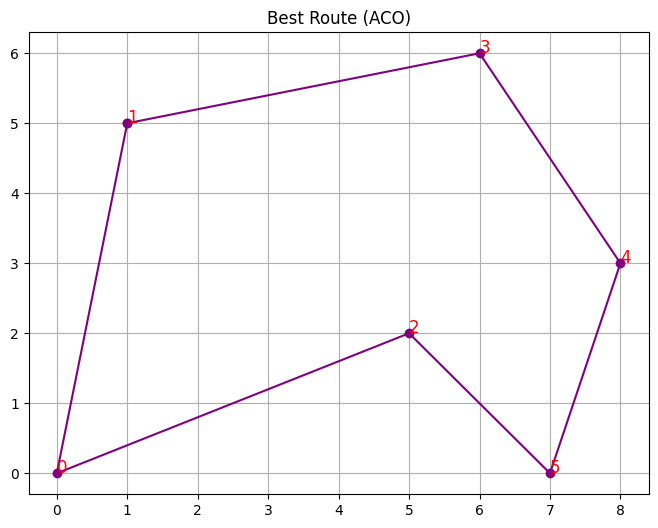

In [10]:
# Visualize best route
def plot_route(route):
    x = [cities[i][0] for i in route] + [cities[route[0]][0]]
    y = [cities[i][1] for i in route] + [cities[route[0]][1]]
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', color='purple')
    for i, city in enumerate(route):
        plt.text(cities[city][0], cities[city][1], str(city), fontsize=12, color='red')
    plt.title("Best Route (ACO)")
    plt.grid()
    plt.show()

plot_route(best_route)